# DATA CLEANING AND EXPLORATORY ANALYSIS

In [530]:
# Importing the necesasry libraries to start out analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [531]:
#Setting the display to max so we can see all the rows and columns in the dataset. 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [532]:
#Reading the dataset and replaying " " with Nan
covid_data = pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")
covid_data.replace(" ",np.nan,inplace = True)

In [533]:
# Analyzing the size and shape of df
covid_data.shape
#The dataset has 28825 rows and 79 columns.

(28825, 79)

In [534]:
#We think i3_health should be the target variable as it can help predict whether or not a person 
#tests positive or negative for covid based on the survey. Finding the categories in i3_health and removing the Nulls
#since there are just 405 records and this is small compared to number of rows
covid_data['i3_health'].isna().sum()
covid_data.dropna(subset=['i3_health'],inplace=True)

covid_data.i3_health.value_counts()


No, I have not                                               26284
Yes, and I tested negative                                    1515
Yes, and I have not received my results from the test yet      341
Yes, and I tested positive                                     280
Name: i3_health, dtype: int64

In [535]:
#Finding the number of null values in each column. 
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28420 entries, 0 to 28823
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               28420 non-null  int64  
 1   RecordNo            28420 non-null  object 
 2   endtime             28420 non-null  object 
 3   qweek               28420 non-null  object 
 4   i1_health           28420 non-null  int64  
 5   i2_health           28420 non-null  int64  
 6   i7a_health          28420 non-null  int64  
 7   i3_health           28420 non-null  object 
 8   i4_health           27810 non-null  object 
 9   i5_health_1         27939 non-null  object 
 10  i5_health_2         27939 non-null  object 
 11  i5_health_3         27939 non-null  object 
 12  i5_health_4         27939 non-null  object 
 13  i5_health_5         27939 non-null  object 
 14  i5_health_99        27939 non-null  object 
 15  i5a_health          2584 non-null   object 
 16  i6_h

For i12_health_9 and i12_health_10, because in the later sections as we need these columns for a combined variables, 
i12_health_10- avoided letting children go outside to school - Replacing the null values - which we assumed people left null if they do not have kids, is to change the null values to "Not at all". If someone does not have a child,they obviosuly do not step out for school and this reduces covid contraction possibilities.

i12_health_9 - Avoided working outside you home - For those missing i12_9, we put Sometimes, as we assume those people do not have a job and have can either. This is essentially like taking the average value for the ones who have not clarified their job status. They could have jobs indoor which would mean Always indoors, or they could be homeless which means they are not indoors at all. Substituting these values.

In [536]:
covid_data["i12_health_10"].fillna("Not at all", inplace = True)
covid_data["i12_health_9"].fillna("Sometimes", inplace = True)
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28420 entries, 0 to 28823
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               28420 non-null  int64  
 1   RecordNo            28420 non-null  object 
 2   endtime             28420 non-null  object 
 3   qweek               28420 non-null  object 
 4   i1_health           28420 non-null  int64  
 5   i2_health           28420 non-null  int64  
 6   i7a_health          28420 non-null  int64  
 7   i3_health           28420 non-null  object 
 8   i4_health           27810 non-null  object 
 9   i5_health_1         27939 non-null  object 
 10  i5_health_2         27939 non-null  object 
 11  i5_health_3         27939 non-null  object 
 12  i5_health_4         27939 non-null  object 
 13  i5_health_5         27939 non-null  object 
 14  i5_health_99        27939 non-null  object 
 15  i5a_health          2584 non-null   object 
 16  i6_h

i14_health series gives important information about the work that people do, whether they get out of their homes, are front line workers or tend to work from home. Though this can be attributed to having a direct relationship towards increased chance of getting covid when stepping outsode home/ being a frontline worker, since around 16,402 variables are missing, there is not much we can do with it. 

TRIALS- We tried creating a new variable which is a combination of all the variables, the variable would be OutdoorWork and would be categorical with value 1 when the work required stepping out of the house. But this was also not possible as when one of the i14_health variables were null, all the other were also null and i14_health_other corresponded to __NA__ which also conveyed no useful information. 

In order to show these null values from which we decided to proceed by dropping these colums, the filtered df head is shown below.

In [537]:
i14_health_covid_data =covid_data.iloc[:,43:57]

In [538]:
i14_health_covid_data.isna().sum()
i14_health_covid_data[i14_health_covid_data.i14_health_1.isnull()].head()

,i14_health_1,i14_health_2,i14_health_3,i14_health_4,i14_health_5,i14_health_6,i14_health_7,i14_health_8,i14_health_9,i14_health_10,i14_health_96,i14_health_98,i14_health_99,i14_health_other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,__NA__
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,__NA__
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,__NA__
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,__NA__
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,__NA__


In [539]:
covid_data.drop(columns=covid_data.iloc[:,43:57].columns.tolist(), inplace=True)


In [540]:
#Assuming a threshold of 60% non-null values to be present for the column to be considered for data analysis. 
thresh = len(covid_data) * .6
covid_data_NoNull=covid_data.dropna(thresh = thresh, axis = 1)

In [541]:
#ID Field and RecordNo are primary keys for this dataset and are not useful for classfication tasks
#Similarly, since we are not considering any time series analysis and time does not affect whether a person tests
#positive for covid or not, we do not consider these rows also
covid_data_NoNull.drop(columns=['Index','RecordNo','endtime','qweek'],inplace = True)

/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/952514757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull.drop(columns=['Index','RecordNo','endtime','qweek'],inplace = True)


d1_health series -
ASSUMPTION - It is a section in the survey which gives people the option to click on the diseases they have. What we validated was if they didn't answer one, they did not answer any of the questions. Since we believe that having comorbities is an important estimator of predicitng covid and it gets more and more important to predict accurately for someone who has comorbities to avoid serious scenarios and in certain cases death, we avoid the 2605 null rows.

Similar to the previous, we thought of just taking d1_health_99 which is "None of These" as our predictor variable in the main dataset which has a 1 when patients have any one of the diseases and 0 when they have none. Another decision we made was to ignore rare diseased which are not listed (example - Lupas which affects the immune system of the body and can cause the severity of covid symptoms to increase explonentially. But, when these were null, all the other colums in d1_health were also null leading to non-transformable information. This is shown in the analysis below.  

# Analyzing d1 health series

In [542]:
covid_data_NoNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28420 entries, 0 to 28823
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   i1_health           28420 non-null  int64  
 1   i2_health           28420 non-null  int64  
 2   i7a_health          28420 non-null  int64  
 3   i3_health           28420 non-null  object 
 4   i4_health           27810 non-null  object 
 5   i5_health_1         27939 non-null  object 
 6   i5_health_2         27939 non-null  object 
 7   i5_health_3         27939 non-null  object 
 8   i5_health_4         27939 non-null  object 
 9   i5_health_5         27939 non-null  object 
 10  i5_health_99        27939 non-null  object 
 11  i9_health           26522 non-null  object 
 12  i10_health          26522 non-null  object 
 13  i11_health          26522 non-null  object 
 14  i12_health_1        28420 non-null  object 
 15  i12_health_2        28420 non-null  object 
 16  i12_

In [543]:
d1_health_covid_data=covid_data_NoNull.iloc[:,35:50]

In [544]:
d1_health_covid_data.isna().sum()
d1_health_covid_data[d1_health_covid_data.d1_health_1.isnull()].shape

(2605, 15)

In [545]:
d1_health_covid_data[d1_health_covid_data.d1_health_1.isnull()].head()

,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [546]:
d1_health_column_names = list(d1_health_covid_data.columns.values)
d1_health_covid_data.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

In [547]:
d1_health_covid_data['d1_health_combined']=d1_health_covid_data.sum(axis=1)
d1_health_covid_data.head()

,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99,d1_health_combined
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [548]:
covid_data_NoNull.dropna(subset=d1_health_column_names,inplace=True)
covid_data_NoNull['d1_health_combined']=d1_health_covid_data['d1_health_combined']

/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/4051115050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull.dropna(subset=d1_health_column_names,inplace=True)
/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/4051115050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull['d1_health_combined']=d1_health_covid_data['d1_health_combined']


In [549]:
covid_data_NoNull.drop(covid_data_NoNull.iloc[:, 35:50],axis = 1,inplace=True)
covid_data_NoNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25815 entries, 0 to 28823
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   i1_health           25815 non-null  int64  
 1   i2_health           25815 non-null  int64  
 2   i7a_health          25815 non-null  int64  
 3   i3_health           25815 non-null  object 
 4   i4_health           25341 non-null  object 
 5   i5_health_1         25446 non-null  object 
 6   i5_health_2         25446 non-null  object 
 7   i5_health_3         25446 non-null  object 
 8   i5_health_4         25446 non-null  object 
 9   i5_health_5         25446 non-null  object 
 10  i5_health_99        25446 non-null  object 
 11  i9_health           24201 non-null  object 
 12  i10_health          24201 non-null  object 
 13  i11_health          24201 non-null  object 
 14  i12_health_1        25815 non-null  object 
 15  i12_health_2        25815 non-null  object 
 16  i12_

/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/3959783111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull.drop(covid_data_NoNull.iloc[:, 35:50],axis = 1,inplace=True)


Also, combine these questions as one variable to reduce dimensions.
Drop these who prefer not to say, because it is same as leaving it blank, it is useless
Droping i_99 because if no disease, all other disease add up is 0, we don't need i_99


# MAIN CONCERN

Since i3_health is our predictor variable and the business problem would be to use the model to predict whether the person has covid or not based on the survey, we need a binary target with 1 for positve and 0 for negative.

But from the value counts of i3_health, we see<br>
No, I have not has                                            26284 rows<br>
Yes, and I tested negative has                                    1515 rows<br>
Yes, and I have not received my results from the test yet has     341 rows<br>
Yes, and I tested positive has                                     280 rows<br>

If we only take Yes, and I tested negative  and Yes, and I tested positive we reduced the avaiable data to almost 1/20th of the current dataset size and this may lead to heavy bias in our model. 

In order to overcome this, we thought of builing a score, which calculates the symptoms a current person experiences weighted depending on how closely associated to covid it is and whether the person has come in contact with someone who tested positive over the last 7 days. Once the score is built, we can estimate a threshold for of it for those who test positive and those who test negative. Once the threshold is calculated, we can categorize all those who have not tested or those who are waiting for their test results into a positive or negative category. But 


In [550]:
i5_health_covid_data=covid_data_NoNull.iloc[:,5:11]

In [551]:
i5_health_covid_data.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)
i5_health_covid_data.head()

,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [552]:
i5_health_covid_data['i5_weighted_sum']= 1*i5_health_covid_data['i5_health_1']+2*i5_health_covid_data['i5_health_2']+3*i5_health_covid_data['i5_health_3']+3*i5_health_covid_data['i5_health_4']+4*i5_health_covid_data['i5_health_5']+0*i5_health_covid_data['i5_health_99']






In [553]:
i5_health_covid_data.head()

,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99,i5_weighted_sum
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [554]:
covid_data_NoNull['i5_weighted_sum'] = i5_health_covid_data['i5_weighted_sum']
covid_data_NoNull.drop(covid_data_NoNull.iloc[:, 5:11],axis = 1,inplace=True)

/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/3521825080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull['i5_weighted_sum'] = i5_health_covid_data['i5_weighted_sum']
/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/3521825080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull.drop(covid_data_NoNull.iloc[:, 5:11],axis = 1,inplace=True)


In [555]:
covid_data_NoNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25815 entries, 0 to 28823
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   i1_health           25815 non-null  int64  
 1   i2_health           25815 non-null  int64  
 2   i7a_health          25815 non-null  int64  
 3   i3_health           25815 non-null  object 
 4   i4_health           25341 non-null  object 
 5   i9_health           24201 non-null  object 
 6   i10_health          24201 non-null  object 
 7   i11_health          24201 non-null  object 
 8   i12_health_1        25815 non-null  object 
 9   i12_health_2        25815 non-null  object 
 10  i12_health_3        25815 non-null  object 
 11  i12_health_4        25815 non-null  object 
 12  i12_health_5        25815 non-null  object 
 13  i12_health_6        25815 non-null  object 
 14  i12_health_7        25815 non-null  object 
 15  i12_health_8        25815 non-null  object 
 16  i12_

# Handling i12_health_series

i12_health series gives us the behavioral aspects of a person. All the questions are directed in such a way s as to avoid behaviour which will lead to covid spreading. So for example one of the question is avoided going to shops or wore face masks when stepping out. So Always following a protocol which leads to less reisk of contracting covid maps to 1, that is 1 is the best score one can get to avoid covid in this series. Whereas if someone marked a 5 , they have more chance of contracting covid.

We plan on combining this by summing all the columns. And logically, when the sum is lower, the chances that someone gets covid would be much lesser

In [556]:
i12_health_covid_data=covid_data_NoNull.iloc[:,8:28]
i12_health_covid_data.head()

,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_14,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20
0,Not at all,Always,Frequently,Always,Always,Frequently,Always,Always,Sometimes,Not at all,Always,Always,Always,Always,Always,Frequently,Always,Always,Frequently,Always
1,Not at all,Always,Frequently,Always,Not at all,Frequently,Always,Always,Sometimes,Not at all,Always,Frequently,Always,Always,Frequently,Sometimes,Not at all,Not at all,Sometimes,Always
2,Frequently,Frequently,Sometimes,Always,Always,Always,Frequently,Always,Frequently,Always,Always,Frequently,Always,Always,Always,Frequently,Not at all,Always,Rarely,Frequently
3,Frequently,Frequently,Always,Always,Always,Always,Always,Always,Sometimes,Not at all,Always,Always,Always,Always,Always,Always,Not at all,Always,Frequently,Always
4,Not at all,Sometimes,Rarely,Always,Always,Frequently,Always,Always,Sometimes,Not at all,Always,Always,Always,Always,Always,Frequently,Not at all,Not at all,Not at all,Frequently


In [557]:
i12_health_covid_data.replace(to_replace=['Always', 'Frequently','Sometimes','Rarely','Not at all'], value=[1,2,3,4,5],inplace=True)

In [558]:
i12_health_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25815 entries, 0 to 28823
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   i12_health_1   25815 non-null  int64
 1   i12_health_2   25815 non-null  int64
 2   i12_health_3   25815 non-null  int64
 3   i12_health_4   25815 non-null  int64
 4   i12_health_5   25815 non-null  int64
 5   i12_health_6   25815 non-null  int64
 6   i12_health_7   25815 non-null  int64
 7   i12_health_8   25815 non-null  int64
 8   i12_health_9   25815 non-null  int64
 9   i12_health_10  25815 non-null  int64
 10  i12_health_11  25815 non-null  int64
 11  i12_health_12  25815 non-null  int64
 12  i12_health_13  25815 non-null  int64
 13  i12_health_14  25815 non-null  int64
 14  i12_health_15  25815 non-null  int64
 15  i12_health_16  25815 non-null  int64
 16  i12_health_17  25815 non-null  int64
 17  i12_health_18  25815 non-null  int64
 18  i12_health_19  25815 non-null  int64
 19  i12_

In [559]:
i12_health_covid_data['i12_health_combined']=i12_health_covid_data.sum(axis=1)
i12_health_covid_data.head()

,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_14,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,i12_health_combined
0,5,1,2,1,1,2,1,1,3,5,1,1,1,1,1,2,1,1,2,1,34
1,5,1,2,1,5,2,1,1,3,5,1,2,1,1,2,3,5,5,3,1,50
2,2,2,3,1,1,1,2,1,2,1,1,2,1,1,1,2,5,1,4,2,36
3,2,2,1,1,1,1,1,1,3,5,1,1,1,1,1,1,5,1,2,1,33
4,5,3,4,1,1,2,1,1,3,5,1,1,1,1,1,2,5,5,5,2,50


In [560]:
covid_data_NoNull['i12_health_combined']=i12_health_covid_data['i12_health_combined']
covid_data_NoNull.drop(covid_data_NoNull.iloc[:, 8:28],axis = 1,inplace=True)
covid_data_NoNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25815 entries, 0 to 28823
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i1_health            25815 non-null  int64  
 1   i2_health            25815 non-null  int64  
 2   i7a_health           25815 non-null  int64  
 3   i3_health            25815 non-null  object 
 4   i4_health            25341 non-null  object 
 5   i9_health            24201 non-null  object 
 6   i10_health           24201 non-null  object 
 7   i11_health           24201 non-null  object 
 8   i13_health           25815 non-null  int64  
 9   weight               25815 non-null  float64
 10  gender               25815 non-null  object 
 11  age                  25815 non-null  int64  
 12  region_state         25815 non-null  object 
 13  household_size       25815 non-null  object 
 14  household_children   25815 non-null  object 
 15  employment_status    25815 non-null 

/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/895877793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull['i12_health_combined']=i12_health_covid_data['i12_health_combined']
/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/895877793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull.drop(covid_data_NoNull.iloc[:, 8:28],axis = 1,inplace=True)


i13_health - Thinking about yesterday… about how many times, would you say you washed your hands with soap or used hand sanitiser? is already captured in i12_health_2 - Washed hands frequently and i12_health_3- use hand sanitizer. As the information provided by i13_health is redundant, we decided to drop this column. 


In [561]:
covid_data_NoNull.drop(columns=['i13_health'],inplace = True)
covid_data_NoNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25815 entries, 0 to 28823
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i1_health            25815 non-null  int64  
 1   i2_health            25815 non-null  int64  
 2   i7a_health           25815 non-null  int64  
 3   i3_health            25815 non-null  object 
 4   i4_health            25341 non-null  object 
 5   i9_health            24201 non-null  object 
 6   i10_health           24201 non-null  object 
 7   i11_health           24201 non-null  object 
 8   weight               25815 non-null  float64
 9   gender               25815 non-null  object 
 10  age                  25815 non-null  int64  
 11  region_state         25815 non-null  object 
 12  household_size       25815 non-null  object 
 13  household_children   25815 non-null  object 
 14  employment_status    25815 non-null  object 
 15  d1_health_combined   25815 non-null 

/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/4185660285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull.drop(columns=['i13_health'],inplace = True)


i9_health, i10_haeelth and i11_health does not give us details about whther  or not a person would contract covid. 
i19_health   about the next 7 days… would you isolate yourself after feeling unwell or having any of the following new symptoms: a dry cough, fever, loss of sense of smell, loss of sense of taste, shortness of breath or difficulty breathing?
i10_health gives If you were advised to do so by a healthcare professional or public health authority, how easy or difficult would it be for you be to self-isolate for 7 days?
i11_health gives If you were advised to do so by a healthcare professional or public health authority to what extent are you willing or not to self-isolate for 7 days?

As none of these questions give an answer which is related to whether a person would get covid or not, we go ahead and drop these columns 


In [562]:
covid_data_NoNull.drop(columns=['i9_health','i10_health','i11_health'],inplace = True)
covid_data_NoNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25815 entries, 0 to 28823
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i1_health            25815 non-null  int64  
 1   i2_health            25815 non-null  int64  
 2   i7a_health           25815 non-null  int64  
 3   i3_health            25815 non-null  object 
 4   i4_health            25341 non-null  object 
 5   weight               25815 non-null  float64
 6   gender               25815 non-null  object 
 7   age                  25815 non-null  int64  
 8   region_state         25815 non-null  object 
 9   household_size       25815 non-null  object 
 10  household_children   25815 non-null  object 
 11  employment_status    25815 non-null  object 
 12  d1_health_combined   25815 non-null  float64
 13  i5_weighted_sum      25446 non-null  float64
 14  i12_health_combined  25815 non-null  int64  
dtypes: float64(3), int64(5), object(7)
m

/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/2196043133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull.drop(columns=['i9_health','i10_health','i11_health'],inplace = True)


In [563]:
covid_data_NoNull.head()

,i1_health,i2_health,i7a_health,i3_health,i4_health,weight,gender,age,region_state,household_size,household_children,employment_status,d1_health_combined,i5_weighted_sum,i12_health_combined
0,0,1,1,"No, I have not","No, they have not",1.036370,Male,73,British Columbia / Colombie Britanique,1,0,Retired,1.0,0.0,34
1,0,6,0,"No, I have not","No, they have not",1.016961,Female,37,British Columbia / Colombie Britanique,1,0,Unemployed,1.0,1.0,50
2,6,1,0,"No, I have not","No, they have not",1.003516,Male,25,Ontario,8 or more,2,Full time employment,2.0,4.0,36
3,1,1,1,"No, I have not","No, they have not",1.002949,Male,66,Ontario,2,0,Retired,2.0,0.0,33
4,1,3,1,"No, I have not","No, they have not",1.028216,Female,25,British Columbia / Colombie Britanique,2,0,Unemployed,1.0,0.0,50


In [564]:
#Replacing the cstring categories to value encoded according to what is given in the excel sheet 
covid_data_NoNull['gender'].replace(to_replace=['Male', 'Female'], value=[1,2],inplace=True)
covid_data_NoNull['employment_status'].replace(to_replace=['Full time employment', 'Part time employment','Full time student','Retired','Unemployed','Not working','Other'], value=[1,2,3,4,5,6,7],inplace=True)
covid_data_NoNull['household_size'].replace(to_replace=['8 or more', "Don't know",'Prefer not to say'], value=[8,9,10],inplace=True)
covid_data_NoNull['household_children'].replace(to_replace=['0','1','2','3','4','5 or more','Prefer not to say'], value=[1,2,3,4,5,6,8],inplace=True)


/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/3595576956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull['gender'].replace(to_replace=['Male', 'Female'], value=[1,2],inplace=True)
/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/3595576956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull['employment_status'].replace(to_replace=['Full time employment', 'Part time employment','Full time student','Retired','Unemployed','Not working','Other'], value=[1,2,3,4,5,6,7],inplace=True)
/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/359

In [565]:
covid_data_NoNull.head()

,i1_health,i2_health,i7a_health,i3_health,i4_health,weight,gender,age,region_state,household_size,household_children,employment_status,d1_health_combined,i5_weighted_sum,i12_health_combined
0,0,1,1,"No, I have not","No, they have not",1.036370,1,73,British Columbia / Colombie Britanique,1,1,4,1.0,0.0,34
1,0,6,0,"No, I have not","No, they have not",1.016961,2,37,British Columbia / Colombie Britanique,1,1,5,1.0,1.0,50
2,6,1,0,"No, I have not","No, they have not",1.003516,1,25,Ontario,8,3,1,2.0,4.0,36
3,1,1,1,"No, I have not","No, they have not",1.002949,1,66,Ontario,2,1,4,2.0,0.0,33
4,1,3,1,"No, I have not","No, they have not",1.028216,2,25,British Columbia / Colombie Britanique,2,1,5,1.0,0.0,50


# CONSIDERATION FOR TARGET VARIABLE 

In [566]:
covid_data_NoNull.i3_health.value_counts()

No, I have not                                               23856
Yes, and I tested negative                                    1402
Yes, and I have not received my results from the test yet      299
Yes, and I tested positive                                     258
Name: i3_health, dtype: int64

In [567]:
covid_data_NoNull.head()

,i1_health,i2_health,i7a_health,i3_health,i4_health,weight,gender,age,region_state,household_size,household_children,employment_status,d1_health_combined,i5_weighted_sum,i12_health_combined
0,0,1,1,"No, I have not","No, they have not",1.036370,1,73,British Columbia / Colombie Britanique,1,1,4,1.0,0.0,34
1,0,6,0,"No, I have not","No, they have not",1.016961,2,37,British Columbia / Colombie Britanique,1,1,5,1.0,1.0,50
2,6,1,0,"No, I have not","No, they have not",1.003516,1,25,Ontario,8,3,1,2.0,4.0,36
3,1,1,1,"No, I have not","No, they have not",1.002949,1,66,Ontario,2,1,4,2.0,0.0,33
4,1,3,1,"No, I have not","No, they have not",1.028216,2,25,British Columbia / Colombie Britanique,2,1,5,1.0,0.0,50


We see that positive and negative cases are so less. which contributes to just abour 6% of the total cases. Just considering this would lead to disposing of 94% of the total data. Which does not make much sense. Instead, we decided to classify Yes, and I have not received my results from the test yet and No, I have not tested to either positive or negative based on the weighted symptoms score and whether they have come into contact with someone who tested positive in the last couple days. For this we first analyse the data with just Yes, and I tested negative and Yes, and I tested positive and their symptom score and i4_health which gives us details regarding whether someone in the househole tested positive in the last 7 days or not. 

In [568]:
positive_negative_test_segment = covid_data_NoNull.loc[(covid_data_NoNull['i3_health']=="Yes, and I tested negative") | (covid_data_NoNull['i3_health']=="Yes, and I tested positive")]




In [569]:
positive_negative_test_segment = positive_negative_test_segment[['i3_health','i4_health','i5_weighted_sum','i12_health_combined']]

In [570]:
positive_negative_test_segment.head()

,i3_health,i4_health,i5_weighted_sum,i12_health_combined
103,"Yes, and I tested negative","Yes, and they tested negative",0.0,45
110,"Yes, and I tested negative","Yes, and they tested negative",3.0,46
127,"Yes, and I tested negative","Yes, and they tested negative",0.0,21
128,"Yes, and I tested positive","No, they have not",0.0,38
134,"Yes, and I tested negative","Yes, and they tested negative",0.0,38


In [571]:
import seaborn as sns

<AxesSubplot:xlabel='i3_health', ylabel='i5_weighted_sum'>

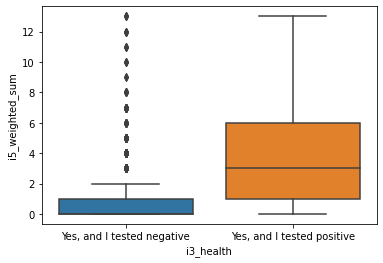

In [572]:
sns.boxplot(x='i3_health',y='i5_weighted_sum',data=positive_negative_test_segment)

In [573]:
positive_negative_test_segment.loc[(covid_data_NoNull['i3_health']=="Yes, and I tested positive")].i5_weighted_sum.mean()


4.0602409638554215

In [574]:
positive_negative_test_segment.loc[(covid_data_NoNull['i3_health']=="Yes, and I tested negative")].i5_weighted_sum.mean()


1.0110132158590308

<AxesSubplot:xlabel='i3_health', ylabel='i12_health_combined'>

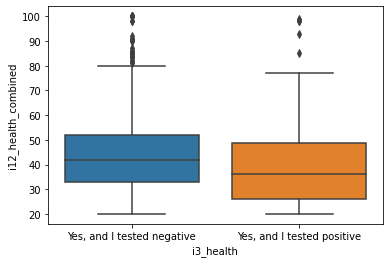

In [575]:
sns.boxplot(x='i3_health',y='i12_health_combined',data=positive_negative_test_segment)

In [576]:
positive_negative_test_segment.loc[(covid_data_NoNull['i3_health']=="Yes, and I tested negative")].i12_health_combined.mean()


43.57203994293866

In [577]:
positive_negative_test_segment.loc[(covid_data_NoNull['i3_health']=="Yes, and I tested positive")].i12_health_combined.mean()


39.12015503875969

<AxesSubplot:xlabel='i3_health'>

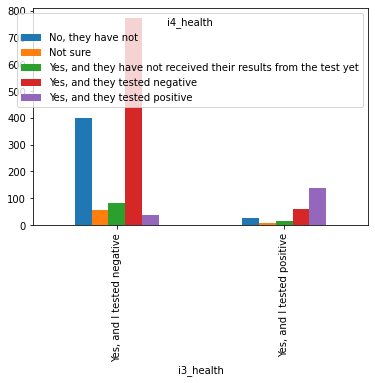

In [578]:
CrosstabResult = pd.crosstab(index =positive_negative_test_segment['i3_health'], columns = positive_negative_test_segment['i4_health'])
CrosstabResult.plot.bar()

In [579]:
CrosstabResult_df=pd.DataFrame(CrosstabResult)
CrosstabResult_df

i4_health,"No, they have not",Not sure,"Yes, and they have not received their results from the test yet","Yes, and they tested negative","Yes, and they tested positive"
i3_health,,,,,
"Yes, and I tested negative",399,57,83,772,39
"Yes, and I tested positive",25,7,14,60,139


From the above results, we see there is a clear distinction between the positive and the negative cases among the variables that we considered. So based on these variable values, we can change the target variable columns to have values of only positive and negative, translating Yes, and I have not received my results from the test yet and No, I have not to positive and negative based on the columns i5_weighted_sum, i4_health and i12_health_combined.

We assume the mean value to perform the classification. From the box plot for i3_health and i5_weighted_sum it is obvious that the mean i5_weighted sum value is higher for those who tested positve at a mean score of 4.06.Similarly for i12_health_combined, the mean score for those who tested positive is lesser at 39. 

And from the cross tab results above we see that for those who tested negative, majority of them have household members who tested negative in the last 7 days or did not test. Similarly, as per our logical assumption as before, most people who tested positive, have their household memebers also who tested positive from tsts perfomred within the last 7 days.

Using the above mean values and value for i4_health, we classify the values in 13_health into either testing positive or negative for covid.

In [580]:
covid_data_NoNull.head()

,i1_health,i2_health,i7a_health,i3_health,i4_health,weight,gender,age,region_state,household_size,household_children,employment_status,d1_health_combined,i5_weighted_sum,i12_health_combined
0,0,1,1,"No, I have not","No, they have not",1.036370,1,73,British Columbia / Colombie Britanique,1,1,4,1.0,0.0,34
1,0,6,0,"No, I have not","No, they have not",1.016961,2,37,British Columbia / Colombie Britanique,1,1,5,1.0,1.0,50
2,6,1,0,"No, I have not","No, they have not",1.003516,1,25,Ontario,8,3,1,2.0,4.0,36
3,1,1,1,"No, I have not","No, they have not",1.002949,1,66,Ontario,2,1,4,2.0,0.0,33
4,1,3,1,"No, I have not","No, they have not",1.028216,2,25,British Columbia / Colombie Britanique,2,1,5,1.0,0.0,50


In [581]:
covid_data_NoNull['i3_health'].replace(to_replace=['Yes, and I tested positive', "Yes, and I tested negative",'Yes, and I have not received my results from the test yet','No, I have not'], value=[1,0,3,4],inplace=True)
covid_data_NoNull['i4_health'].replace(to_replace=['Yes, and they tested positive', "Yes, and they tested negative",'Yes, and they have not received their results from the test yet','No, they have not','Not sure'], value=[1,2,3,4,5],inplace=True)

/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/766365076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull['i3_health'].replace(to_replace=['Yes, and I tested positive', "Yes, and I tested negative",'Yes, and I have not received my results from the test yet','No, I have not'], value=[1,0,3,4],inplace=True)
/var/folders/fw/pt26srf130j4kfmztjqy2m2h0000gn/T/ipykernel_69134/766365076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_NoNull['i4_health'].replace(to_replace=['Yes, and they tested positive', "Yes, and they tested negative",'Yes, and they have not received thei

In [582]:
covid_data_NoNull.head()

,i1_health,i2_health,i7a_health,i3_health,i4_health,weight,gender,age,region_state,household_size,household_children,employment_status,d1_health_combined,i5_weighted_sum,i12_health_combined
0,0,1,1,4,4.0,1.036370,1,73,British Columbia / Colombie Britanique,1,1,4,1.0,0.0,34
1,0,6,0,4,4.0,1.016961,2,37,British Columbia / Colombie Britanique,1,1,5,1.0,1.0,50
2,6,1,0,4,4.0,1.003516,1,25,Ontario,8,3,1,2.0,4.0,36
3,1,1,1,4,4.0,1.002949,1,66,Ontario,2,1,4,2.0,0.0,33
4,1,3,1,4,4.0,1.028216,2,25,British Columbia / Colombie Britanique,2,1,5,1.0,0.0,50


In [583]:
final_data_postitive_negative = covid_data_NoNull.loc[(covid_data_NoNull['i3_health']==1) | (covid_data_NoNull['i3_health']==0)]
                                                                                             
                                                                                             

In [584]:
final_data_target_change = covid_data_NoNull.loc[(covid_data_NoNull['i3_health']==3) | (covid_data_NoNull['i3_health']==4)]



In [585]:
final_data_target_change.loc[(final_data_target_change.i5_weighted_sum >= 4)| (final_data_target_change.i12_health_combined <= 39) |(final_data_target_change.i4_health == 1),'i3_health']=1






In [586]:
final_data_target_change.loc[(final_data_target_change.i5_weighted_sum < 4) | (final_data_target_change.i12_health_combined > 39) |(final_data_target_change.i4_health == 2) ,'i3_health']=0






In [587]:
final_data_target_change.i3_health.value_counts()

0    23719
1      436
Name: i3_health, dtype: int64

In [588]:
frames = [final_data_postitive_negative,final_data_target_change]
final_data = pd.concat(frames)

In [589]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25815 entries, 103 to 28822
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i1_health            25815 non-null  int64  
 1   i2_health            25815 non-null  int64  
 2   i7a_health           25815 non-null  int64  
 3   i3_health            25815 non-null  int64  
 4   i4_health            25341 non-null  float64
 5   weight               25815 non-null  float64
 6   gender               25815 non-null  int64  
 7   age                  25815 non-null  int64  
 8   region_state         25815 non-null  object 
 9   household_size       25815 non-null  object 
 10  household_children   25815 non-null  object 
 11  employment_status    25815 non-null  int64  
 12  d1_health_combined   25815 non-null  float64
 13  i5_weighted_sum      25446 non-null  float64
 14  i12_health_combined  25815 non-null  int64  
dtypes: float64(4), int64(8), object(3)

In [590]:
final_data.household_children.value_counts()
final_data['household_children'].replace(to_replace=["Don't know"], value=[9],inplace=True)

In [591]:
final_data.household_size.value_counts()

2     8897
1     4725
3     4459
4     3641
5     1895
6      809
10     498
7      357
8      269
9      265
Name: household_size, dtype: int64

In [592]:
final_data.i3_health=final_data.i3_health.astype("object")
final_data.gender=final_data.gender.astype("object")
final_data.employment_status=final_data.employment_status.astype("object")

In [593]:
final_data.describe()

,i1_health,i2_health,i7a_health,i4_health,weight,age,household_children,d1_health_combined,i5_weighted_sum,i12_health_combined
count,25815.000000,25815.000000,25815.000000,25341.000000,25815.000000,25815.000000,25815.000000,25815.000000,25446.000000,25815.000000
mean,2.898973,10.879721,1.278210,3.890652,1.006644,48.818168,1.812783,1.666667,0.306374,45.590781
std,23.675020,57.920532,3.337536,0.599329,0.358694,17.429716,1.387754,1.151576,1.212749,15.343512
min,0.000000,0.000000,0.000000,1.000000,0.069373,18.000000,1.000000,1.000000,0.000000,20.000000
25%,1.000000,0.000000,0.000000,4.000000,0.862138,34.000000,1.000000,1.000000,0.000000,35.000000
50%,1.000000,2.000000,1.000000,4.000000,0.989103,51.000000,1.000000,1.000000,0.000000,42.000000
75%,3.000000,6.000000,2.000000,4.000000,1.089207,63.000000,2.000000,2.000000,0.000000,53.000000
max,1000.000000,1000.000000,100.000000,5.000000,13.490421,99.000000,9.000000,13.000000,13.000000,100.000000


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

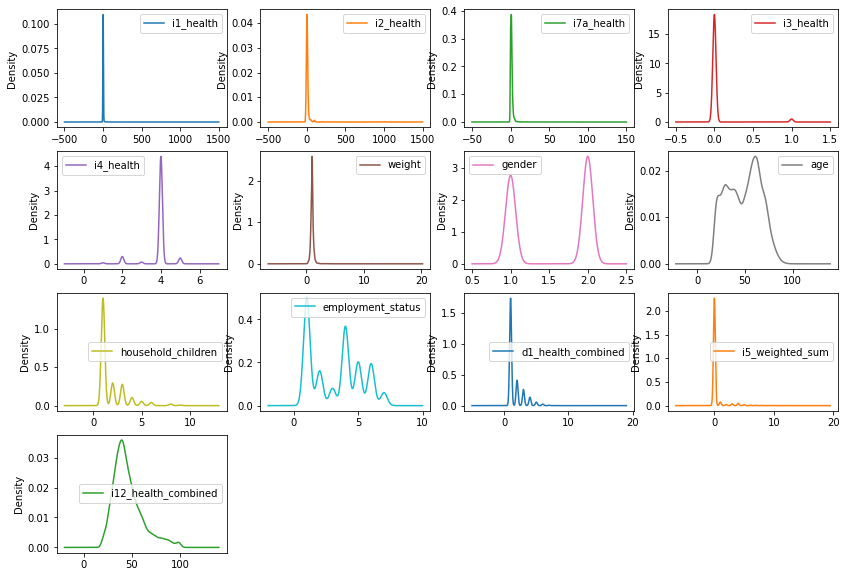

In [594]:
final_data.plot(figsize =(14,10),kind ='density',subplots=True, layout=(4,4),sharex=False)

array([[<AxesSubplot:title={'center':'i1_health'}>,
        <AxesSubplot:title={'center':'i2_health'}>,
        <AxesSubplot:title={'center':'i7a_health'}>],
       [<AxesSubplot:title={'center':'i4_health'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'household_children'}>,
        <AxesSubplot:title={'center':'d1_health_combined'}>,
        <AxesSubplot:title={'center':'i5_weighted_sum'}>],
       [<AxesSubplot:title={'center':'i12_health_combined'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

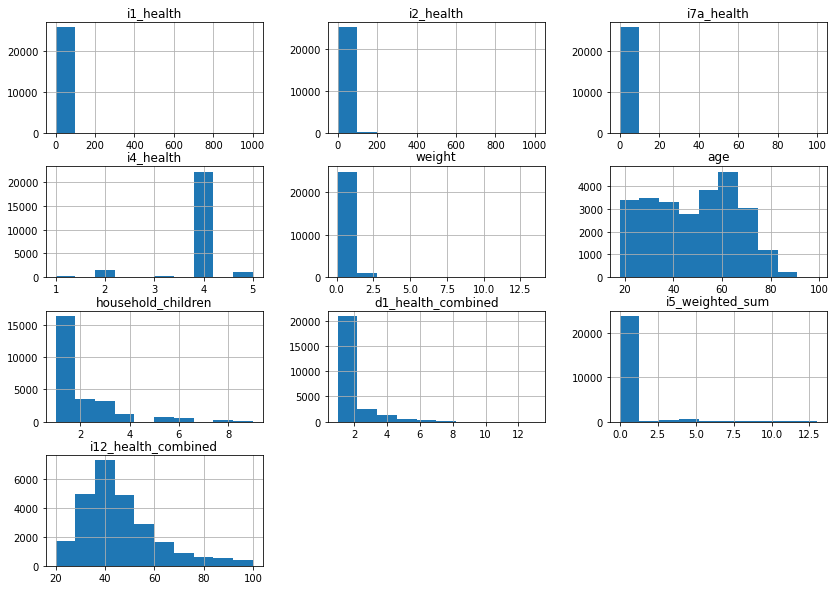

In [595]:
final_data.hist(figsize=(14,10))

In [596]:
final_data['i3_health'].value_counts(normalize= True)*100

0    97.311641
1     2.688359
Name: i3_health, dtype: float64

Text(0.5, 1.0, 'Covid Results')

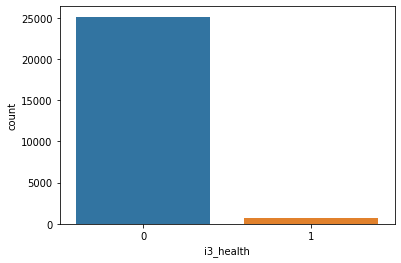

In [597]:
sns.countplot(x='i3_health', data=final_data)
ax.set_title("Covid Results")

In [598]:
final_data_crosstab= pd.crosstab(final_data['i3_health'],final_data['i4_health'],margins=True)
final_data_crosstab

i4_health,1.0,2.0,3.0,4.0,5.0,All
i3_health,,,,,,
0,68,1434,334,21683,1171,24690
1,140,60,24,399,28,651
All,208,1494,358,22082,1199,25341


<AxesSubplot:xlabel='i4_health'>

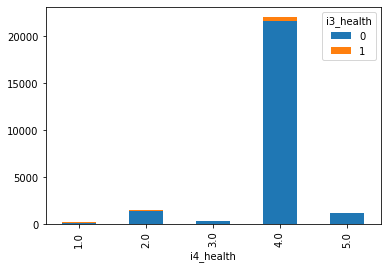

In [601]:
final_data_crosstab= pd.crosstab(final_data['i3_health'],final_data['i4_health'],margins=False)
final_data_crosstab=final_data_crosstab.transpose()
final_data_crosstab.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='gender'>

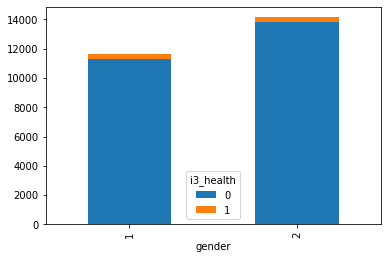

In [603]:
final_data_crosstab_gender = pd.crosstab(final_data['i3_health'],final_data['gender'],margins=False)
final_data_crosstab_gender=final_data_crosstab_gender.transpose()
final_data_crosstab_gender.plot(kind='bar',stacked=True)
# axis 0 is along the rows and axis 1 is along the columns

                     i1_health  i2_health  i7a_health  i4_health    weight  \
i1_health             1.000000   0.278127    0.188266  -0.020693  0.047020   
i2_health             0.278127   1.000000    0.139372   0.000241  0.011724   
i7a_health            0.188266   0.139372    1.000000  -0.096203  0.071408   
i4_health            -0.020693   0.000241   -0.096203   1.000000 -0.044498   
weight                0.047020   0.011724    0.071408  -0.044498  1.000000   
age                  -0.032356  -0.015117   -0.067164   0.110535 -0.071179   
household_children    0.050965   0.010796    0.081636  -0.081021  0.038406   
d1_health_combined    0.013887  -0.009095    0.006934   0.006098 -0.029236   
i5_weighted_sum       0.014937  -0.005983    0.101556  -0.239820  0.044146   
i12_health_combined   0.027956   0.153935    0.118694   0.071724  0.010978   

                          age  household_children  d1_health_combined  \
i1_health           -0.032356            0.050965            0.01388

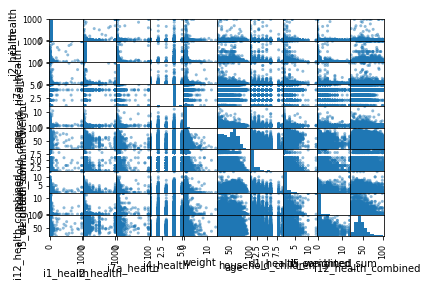

In [604]:
from pandas.plotting import scatter_matrix
scatter_matrix(final_data)

# correlation matrix
correlations = final_data.corr()
print(correlations)

[Text(0, 0, 'i1_health'),
 Text(0, 1, 'i2_health'),
 Text(0, 2, 'i7a_health'),
 Text(0, 3, 'i4_health'),
 Text(0, 4, 'weight'),
 Text(0, 5, 'age'),
 Text(0, 6, 'household_children'),
 Text(0, 7, 'd1_health_combined'),
 Text(0, 8, 'i5_weighted_sum'),
 Text(0, 9, 'i12_health_combined')]

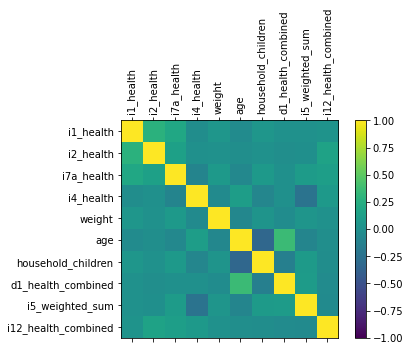

In [608]:
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# change the tick labels
ticks = range(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = final_data.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)

In [609]:
final_data.describe()

,i1_health,i2_health,i7a_health,i4_health,weight,age,household_children,d1_health_combined,i5_weighted_sum,i12_health_combined
count,25815.000000,25815.000000,25815.000000,25341.000000,25815.000000,25815.000000,25815.000000,25815.000000,25446.000000,25815.000000
mean,2.898973,10.879721,1.278210,3.890652,1.006644,48.818168,1.812783,1.666667,0.306374,45.590781
std,23.675020,57.920532,3.337536,0.599329,0.358694,17.429716,1.387754,1.151576,1.212749,15.343512
min,0.000000,0.000000,0.000000,1.000000,0.069373,18.000000,1.000000,1.000000,0.000000,20.000000
25%,1.000000,0.000000,0.000000,4.000000,0.862138,34.000000,1.000000,1.000000,0.000000,35.000000
50%,1.000000,2.000000,1.000000,4.000000,0.989103,51.000000,1.000000,1.000000,0.000000,42.000000
75%,3.000000,6.000000,2.000000,4.000000,1.089207,63.000000,2.000000,2.000000,0.000000,53.000000
max,1000.000000,1000.000000,100.000000,5.000000,13.490421,99.000000,9.000000,13.000000,13.000000,100.000000


In [611]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25815 entries, 103 to 28822
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i1_health            25815 non-null  int64  
 1   i2_health            25815 non-null  int64  
 2   i7a_health           25815 non-null  int64  
 3   i3_health            25815 non-null  object 
 4   i4_health            25341 non-null  float64
 5   weight               25815 non-null  float64
 6   gender               25815 non-null  object 
 7   age                  25815 non-null  int64  
 8   region_state         25815 non-null  object 
 9   household_size       25815 non-null  object 
 10  household_children   25815 non-null  int64  
 11  employment_status    25815 non-null  object 
 12  d1_health_combined   25815 non-null  float64
 13  i5_weighted_sum      25446 non-null  float64
 14  i12_health_combined  25815 non-null  int64  
dtypes: float64(4), int64(6), object(5)